In [35]:
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def load_data(file_path):
    if not os.path.exists(file_path):
        print(f"Помилка: Файл {file_path} не знайдено!")
        return None

    ext = os.path.splitext(file_path)[-1].lower()

    try:
        if ext == '.xlsx':
            df = pd.read_excel(file_path)
        else:
            df = pd.read_csv(file_path)

        print(f"Успішно завантажено! Рядків: {df.shape[0]}, Колонок: {df.shape[1]}")
        return df
    except Exception as e:
        print(f"Не вдалося прочитати файл: {e}")
        return None


In [7]:
df = load_data("nuclear_safety_q4_2025.xlsx")
df.head()

Успішно завантажено! Рядків: 128, Колонок: 16


,year,quarter,station,irg,irg_index,iodine_ radionuclides,iodine_ radionuclides_index,stable_radionuclides,stable_ radionuclides_index,cs_137_emission,co_60_ emission,cs_137_dump,co_60_dump,volume,index_radioactive_releas,index_dump
0,2018,1,ЗАЕС,89.0,0.13,260.0,"<0,01",650.0,0.03,1980.0,1020.0,4330.0,3670.0,833000.0,0.149,0.33
1,2018,1,РАЕС,105.0,0.16,147.0,"<0,01",269.0,0.07,587.0,165.0,4800.0,620.0,2220000.0,0.780,0.096
2,2018,1,ЮУАЕС,45.0,0.10,76.0,"<0,01",116.0,0.02,136.0,373.0,390.0,370.0,14600.0,0.136,0.284
3,2018,1,ХАЕС,31.0,0.07,26.8,"<0,01",37.5,"<0,01",29.4,13.8,380.0,NaN,22070.0,0.110,0.03
4,2018,2,ЗАЕС,84.0,0.12,262.0,"<0,01",640.0,0.03,453.0,1003.0,4627.0,3432.0,812667.0,0.115,0.91


In [8]:
df.columns = [col.strip() for col in df.columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         128 non-null    int64  
 1   quarter                      128 non-null    int64  
 2   station                      128 non-null    object 
 3   irg                          115 non-null    float64
 4   irg_index                    115 non-null    float64
 5   iodine_ radionuclides        115 non-null    float64
 6   iodine_ radionuclides_index  115 non-null    object 
 7   stable_radionuclides         115 non-null    float64
 8   stable_ radionuclides_index  115 non-null    object 
 9   cs_137_emission              115 non-null    float64
 10  co_60_ emission              115 non-null    float64
 11  cs_137_dump                  115 non-null    float64
 12  co_60_dump                   98 non-null     float64
 13  volume              

In [10]:
df['station'] = df['station'].replace('ЮУАЕС', 'ПАЕС')

In [11]:
def fix_numbers(val):
    if pd.isna(val): return np.nan
    s = str(val).replace(',', '.').strip()
    if '<' in s:
        return float(s.replace('<', '')) - 0.001
    try:
        return float(s)
    except:
        return np.nan

In [14]:
numeric_cols = [c for c in df.columns if c not in ['year', 'quarter', 'station']]
for col in numeric_cols:
    df[col] = df[col].apply(fix_numbers)

In [15]:
print(df.isna().sum())

year                            0
quarter                         0
station                         0
irg                            13
irg_index                      13
iodine_ radionuclides          13
iodine_ radionuclides_index    13
stable_radionuclides           13
stable_ radionuclides_index    13
cs_137_emission                13
co_60_ emission                13
cs_137_dump                    13
co_60_dump                     30
volume                         13
index_radioactive_releas       13
index_dump                     13
dtype: int64


In [16]:
print(f"Список станцій: {df['station'].unique()}")

Список станцій: ['ЗАЕС' 'РАЕС' 'ПАЕС' 'ХАЕС']


In [17]:
df

,year,quarter,station,irg,irg_index,iodine_ radionuclides,iodine_ radionuclides_index,stable_radionuclides,stable_ radionuclides_index,cs_137_emission,co_60_ emission,cs_137_dump,co_60_dump,volume,index_radioactive_releas,index_dump
0,2018,1,ЗАЕС,89.0,0.13,260.0,0.009,650.0,0.030,1980.0,1020.0,4330.0,3670.0,833000.0,0.149,0.330
1,2018,1,РАЕС,105.0,0.16,147.0,0.009,269.0,0.070,587.0,165.0,4800.0,620.0,2220000.0,0.780,0.096
2,2018,1,ПАЕС,45.0,0.10,76.0,0.009,116.0,0.020,136.0,373.0,390.0,370.0,14600.0,0.136,0.284
3,2018,1,ХАЕС,31.0,0.07,26.8,0.009,37.5,0.009,29.4,13.8,380.0,NaN,22070.0,0.110,0.030
4,2018,2,ЗАЕС,84.0,0.12,262.0,0.009,640.0,0.030,453.0,1003.0,4627.0,3432.0,812667.0,0.115,0.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2025,3,ХАЕС,30.0,0.07,36.0,0.009,37.0,0.009,31.0,24.0,176.0,11.0,20008.0,0.840,0.098
124,2025,4,ЗАЕС,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,2025,4,РАЕС,131.0,0.22,17.0,0.009,256.0,0.060,225.0,77.0,3743.0,855.0,2903600.0,0.380,0.430
126,2025,4,ПАЕС,40.0,0.09,67.0,0.009,100.0,0.010,23.0,77.0,159.0,154.0,6200.0,4.193,2.868


In [18]:
df = df.drop(columns=['co_60_dump'])

In [22]:
print(df.isna().sum())

year                           0
quarter                        0
station                        0
irg                            0
irg_index                      0
iodine_ radionuclides          0
iodine_ radionuclides_index    0
stable_radionuclides           0
stable_ radionuclides_index    0
cs_137_emission                0
co_60_ emission                0
cs_137_dump                    0
volume                         0
index_radioactive_releas       0
index_dump                     0
dtype: int64


In [21]:
df = df.dropna()

In [23]:
df

,year,quarter,station,irg,irg_index,iodine_ radionuclides,iodine_ radionuclides_index,stable_radionuclides,stable_ radionuclides_index,cs_137_emission,co_60_ emission,cs_137_dump,volume,index_radioactive_releas,index_dump
0,2018,1,ЗАЕС,89.0,0.13,260.0,0.009,650.0,0.030,1980.0,1020.0,4330.0,833000.0,0.149,0.330
1,2018,1,РАЕС,105.0,0.16,147.0,0.009,269.0,0.070,587.0,165.0,4800.0,2220000.0,0.780,0.096
2,2018,1,ПАЕС,45.0,0.10,76.0,0.009,116.0,0.020,136.0,373.0,390.0,14600.0,0.136,0.284
3,2018,1,ХАЕС,31.0,0.07,26.8,0.009,37.5,0.009,29.4,13.8,380.0,22070.0,0.110,0.030
4,2018,2,ЗАЕС,84.0,0.12,262.0,0.009,640.0,0.030,453.0,1003.0,4627.0,812667.0,0.115,0.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2025,3,ПАЕС,25.0,0.06,73.0,0.009,112.0,0.010,41.0,148.0,878.0,34500.0,4.267,2.787
123,2025,3,ХАЕС,30.0,0.07,36.0,0.009,37.0,0.009,31.0,24.0,176.0,20008.0,0.840,0.098
125,2025,4,РАЕС,131.0,0.22,17.0,0.009,256.0,0.060,225.0,77.0,3743.0,2903600.0,0.380,0.430
126,2025,4,ПАЕС,40.0,0.09,67.0,0.009,100.0,0.010,23.0,77.0,159.0,6200.0,4.193,2.868


In [26]:
def run_anomaly_detection(X, contamination=0.05):
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    anomalies = iso_forest.fit_predict(X)
    return anomalies

In [27]:
def prepare_task_datasets(df):
    numeric_features = [
        'irg', 'irg_index', 'iodine_ radionuclides', 'iodine_ radionuclides_index',
        'stable_radionuclides', 'stable_ radionuclides_index', 'cs_137_emission',
        'co_60_ emission', 'cs_137_dump', 'volume'
    ]
    
    df_anomaly = df[numeric_features].copy()

    X_class = df[numeric_features].copy()
    y_class = df['station'].copy()
    
    df_factors = df[numeric_features + ['index_radioactive_releas']].copy()
    
    return df_anomaly, X_class, y_class, df_factors

In [28]:
def run_models_workflow(df):    
    df_anom, X_cl, y_cl, df_fact = prepare_task_datasets(df)
    
    iso = IsolationForest(contamination=0.05, random_state=42)
    anomalies = iso.fit_predict(df_anom)

    X_train, X_test, y_train, y_test = train_test_split(
        X_cl, y_cl, test_size=0.2, random_state=42, stratify=y_cl
    )
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    feat_importance = pd.Series(rf.feature_importances_, index=X_cl.columns).sort_values(ascending=False)
    correlations = df_fact.corr()['index_radioactive_releas'].sort_values(ascending=False)
    
    return anomalies, rf, X_test, y_test, feat_importance, correlations

In [31]:
anomalies, rf_model, X_test, y_test, feat_importance, correlations = run_models_workflow(df)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [34]:
df['anomaly_label'] = anomalies
total_anomalies = len(df[df['anomaly_label'] == -1])

print(f"Виявлено аномальних записів: {total_anomalies}")

if total_anomalies > 0:
    print("\nСписок знайдених аномалій (найбільші відхилення):")
    display(df[df['anomaly_label'] == -1].head(10))

Виявлено аномальних записів: 6

Список знайдених аномалій (найбільші відхилення):


,year,quarter,station,irg,irg_index,iodine_ radionuclides,iodine_ radionuclides_index,stable_radionuclides,stable_ radionuclides_index,cs_137_emission,co_60_ emission,cs_137_dump,volume,index_radioactive_releas,index_dump,anomaly_label
0,2018,1,ЗАЕС,89.0,0.13,260.0,0.009,650.0,0.03,1980.0,1020.0,4330.0,833000.0,0.149,0.33,-1
21,2019,2,РАЕС,107.0,0.16,37.0,0.009,287.0,0.08,181.0,3639.0,13270.0,2737100.0,0.910,0.46,-1
64,2022,1,ЗАЕС,73.0,0.10,65.0,0.009,604.0,0.08,2115.0,413.0,3097.0,855543.0,0.940,0.13,-1
73,2022,3,РАЕС,176.0,0.29,31.0,0.009,236.0,0.06,1046.0,201.0,9032.0,3259600.0,0.590,0.36,-1
77,2022,4,РАЕС,205.0,0.34,94.0,0.009,219.0,0.05,431.0,117.0,5209.0,2774300.0,0.710,0.55,-1
81,2023,1,РАЕС,137.0,0.23,356.0,0.009,311.0,0.08,129.0,756.0,5536.0,2528700.0,0.600,0.11,-1


In [36]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

print("\nВажливість показників для розрізнення станцій:")
display(feat_importance.to_frame(name='Importance score'))

              precision    recall  f1-score   support

        ЗАЕС       1.00      1.00      1.00         4
        ПАЕС       1.00      1.00      1.00         6
        РАЕС       1.00      1.00      1.00         6
        ХАЕС       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23


Важливість показників для розрізнення станцій:


,Importance score
volume,0.184306
irg,0.181052
stable_radionuclides,0.165421
stable_ radionuclides_index,0.132174
irg_index,0.101718
iodine_ radionuclides,0.097412
cs_137_emission,0.080646
co_60_ emission,0.037322
cs_137_dump,0.019950
iodine_ radionuclides_index,0.000000


Кореляція показників з 'index_radioactive_releas' (від найбільшої):


,Correlation Coeff
index_radioactive_releas,1.000000
iodine_ radionuclides,0.051074
cs_137_dump,-0.008716
stable_radionuclides,-0.016419
co_60_ emission,-0.048922
stable_ radionuclides_index,-0.122178
cs_137_emission,-0.143724
volume,-0.205330
irg_index,-0.222305
irg,-0.229078


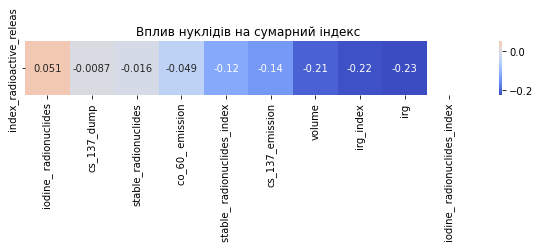

In [37]:
print("Кореляція показників з 'index_radioactive_releas' (від найбільшої):")
display(correlations.to_frame(name='Correlation Coeff'))

plt.figure(figsize=(10, 1))
sns.heatmap(correlations.to_frame().T.drop(columns=['index_radioactive_releas']), 
            annot=True, cmap='coolwarm', center=0)
plt.title("Вплив нуклідів на сумарний індекс")
plt.show()